## ** Online retail **
Bộ dữ liệu Online Retail mô tả tình hình kinh doanh của một doanh nghiệp bán hàng Online mà bạn đã được làm quen từ buổi 1. Yêu cầu:

1.	Phát hiện các dòng, cột chứa dữ liệu khuyết thiếu
	Có nên xóa hết các dòng chứa dữ liệu khuyết thiếu, giải thích vì sao
	Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu của thuộc tính Description bằng giá trị mặc định “Không biết”

2.	Thực hiện phát hiện giá trị ngoại lai của thuộc tính Quantity và Thuộc tính UnitPrice
	Tiến hành lọc riêng bộ dữ liệu chứa giá trị ngoại lai và bộ dữ liệu sạch
	Mô tả thông tin của bộ dữ liệu trên và nhận xét


In [1]:
import pandas as pd
import numpy as np
print('khai báo thư viện thành công')


khai báo thư viện thành công


In [5]:
data = pd.read_csv('OnlineRetail.csv', header=0, encoding = "ISO-8859-1")
display(data)
print("Đã nhập dữ liệu thành công")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


Đã nhập dữ liệu thành công


## 1.Phát hiện các dòng, cột chứa dữ liệu khuyết thiếu Có nên xóa hết các dòng chứa dữ liệu khuyết thiếu, giải thích vì sao Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu của thuộc tính Description bằng giá trị mặc định “Không biết”

In [19]:
#tìm dữ liệu khiếu thiếu
data.isna()
# Thay thế giá trị khuyết thiếu
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [31]:
# Thay the
data['Description'] = data['Description'].fillna('Không biết')

In [34]:
data.fillna(value= {"Description": 'không biết'}, inplace = True)
data.loc[:,'Description']=='không biết'

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: Description, Length: 541909, dtype: bool

## 2.Thực hiện phát hiện giá trị ngoại lai của thuộc tính Quantity và Thuộc tính UnitPrice Tiến hành lọc riêng bộ dữ liệu chứa giá trị ngoại lai và bộ dữ liệu sạch Mô tả thông tin của bộ dữ liệu trên và nhận xét

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#khởi tạo dữ liệu
data = pd.read_csv('OnlineRetail.csv', header=0, encoding = "ISO-8859-1")

import seaborn as sns  # import thư viện seaborn để vẽ biểu đồ
sns.boxplot(x=data['Quantity'])  # vẽ box plot cho dữ liệu ở cột DIS UnitPrice

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

print((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

data2 = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

KeyError: 'DIS'

C:\Users\MY HOA\AppData\Local\Temp\ipykernel_8452\3892868923.py:16: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data1 = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]


,Quantity,UnitPrice,CustomerID
count,444108.000000,444108.000000,327498.000000
mean,4.803066,2.694544,15345.003670
std,4.616762,1.930320,1704.517156
min,-12.000000,0.000000,12347.000000
25%,1.000000,1.250000,14041.000000
50%,3.000000,2.080000,15287.000000
75%,8.000000,3.750000,16843.000000
max,23.000000,8.330000,18287.000000


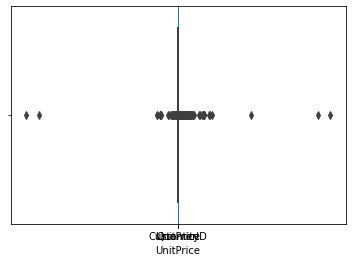

In [41]:
import seaborn as sns
# Mô tả dữ liệu
data.describe()
# vẽ biểu đồ boxplot cho các đặc trưng
data.boxplot()
# vẽ biểu đồ box plot cho 2 cột
sns.boxplot(x=data["Quantity"])
sns.boxplot(x=data["UnitPrice"])
#Xử lý ngoại lai với IQR
# tính giá trị Q1 và Q3
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
# tính IQR 
IQR = Q3-Q1
# lọc dữ liệu ngoại lai
data1 = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
# Mô tả dữ liệu sau khi lọc
sns.boxplot(x=data1["Quantity"])
sns.boxplot(x=data1["UnitPrice"])
data1.describe()


In [ ]:
# tính điểm z-score để chuẩn hóa dữ liệu
# nó càng lệch điểm chuẩn thì càng là giá trị ngoại lai
# giá trị gần gốc 0 thì phù hợp với nhau
# giá trị càng xa gốc không thì gọi là giá trị ngoại lai, đột biến
# giá trị z_up <3 thì càng gần điểm chuẩn hóa 0, giá trị 3 là giá trị kinh nghiệm
